In [251]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 120)
pd.set_option('display.max_columns', 100)

raw_df = (pd.read_csv("data.csv"))
#display(raw_df.columns)
display(raw_df)

,id,listing_url,scrape_id,last_scraped,name,picture_url,host_id,host_url,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20201009050447,2020-10-11,Quiet Garden View Room & Super Fast WiFi,https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands",NaN,NaN,100%,t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,Indische Buurt,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,NaN,52.36575,4.94142,Private room in apartment,Private room,2,NaN,1.5 shared baths,1.0,2.0,"[""Laptop-friendly workspace"", ""Coffee maker"", ...",$59.00,3,1125,3,3,1125,1125,3.0,1125.0,NaN,t,0,0,0,0,2020-10-11,278,6,0,2009-03-30,2020-02-14,98.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,t,1,0,1,0,1.98
1,20168,https://www.airbnb.com/rooms/20168,20201009050447,2020-10-11,Studio with private bathroom in the centre 1,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,Alexander,2009-12-02,"Amsterdam, Noord-Holland, The Netherlands",NaN,NaN,100%,f,https://a0.muscache.com/im/pictures/user/65092...,https://a0.muscache.com/im/pictures/user/65092...,Grachtengordel,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Amsterdam, North Holland, Netherlands",Centrum-Oost,NaN,52.36424,4.89396,Private room in townhouse,Private room,2,NaN,1 private bath,1.0,1.0,"[""Laptop-friendly workspace"", ""TV"", ""Carbon mo...",$236.00,1,365,4,4,60,365,4.0,250.7,NaN,t,0,0,0,0,2020-10-11,340,48,0,2010-03-02,2020-04-09,89.0,10.0,10.0,10.0,10.0,10.0,9.0,NaN,t,2,0,2,0,2.63
2,25428,https://www.airbnb.com/rooms/25428,20201009050447,2020-10-11,Lovely apt in City Centre (w.lift) near Jordaan,https://a0.muscache.com/pictures/138431/7079a9...,56142,https://www.airbnb.com/users/show/56142,Joan,2009-11-20,"New York, New York, United States",within a few hours,100%,39%,t,https://a0.muscache.com/im/users/56142/profile...,https://a0.muscache.com/im/users/56142/profile...,Grachtengordel,2.0,2.0,"['email', 'phone', 'reviews']",t,f,NaN,Centrum-West,NaN,52.37297,4.88339,Entire apartment,Entire home/apt,3,NaN,1 bath,1.0,1.0,"[""Laptop-friendly workspace"", ""Kitchen"", ""Dish...",$125.00,14,180,14,14,180,180,14.0,180.0,NaN,t,0,0,4,58,2020-10-11,5,2,0,2018-01-21,2020-02-09,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,0.15
3,27886,https://www.airbnb.com/rooms/27886,20201009050447,2020-10-10,"Romantic, stylish B&B houseboat in canal district",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,Flip,2010-03-23,"Amsterdam, Noord-Holland, The Netherlands",NaN,NaN,100%,t,https://a0.muscache.com/im/users/97647/p

In [252]:
# Определяем стратегии трансформации данных
# Сама трансформация определена в mappers.py
# TODO: Разобраться с категориальными переменными

col_strategies = {
#     'id': 'Ignore',
#     'listing_url': 'Ignore',
#     'scrape_id': 'Ignore',
#     'last_scraped': 'Ignore',
#     'name': 'Ignore',
#     'picture_url': 'Ignore',
#     'host_id': 'Ignore',
#     'host_url': 'Ignore',
#     'host_name': 'Ignore',
#     'host_since': 'Ignore',
#     'host_location': 'Ignore',
#     'host_response_time': 'Ignore',
#     'host_response_rate': 'Percentage', #Очень много пропущенных! 67%
#     'host_acceptance_rate': 'Percentage', #Очень много пропущенных! 44%
    'host_is_superhost': 'Boolean',
#     'host_thumbnail_url': 'Ignore',
#     'host_picture_url': 'Ignore',
#     'host_neighbourhood': 'Ignore',
    'host_listings_count': 'Float',
#     'host_total_listings_count': 'Ignore',
#     'host_verifications': 'Ignore',
#    'host_has_profile_pic': 'Boolean',
    'host_identity_verified': 'Boolean',
#     'neighbourhood': 'Ignore',
    'neighbourhood_cleansed': 'Id',
#     'neighbourhood_group_cleansed': 'Id',
#     'latitude': 'Ignore',
#     'longitude': 'Ignore',
    'property_type': 'Id',
#    'room_type': 'Id',
    'accommodates': 'Float',
#     'bathrooms': 'Float', #Очень много пропущенных! 100%!!!
#     'bathrooms_text': 'Ignore',
    'bedrooms': 'Float',
#     'beds': 'Float',
    'amenities': 'Id',
    'price': 'Price',
    'minimum_nights': 'Float',
    'maximum_nights': 'Float',
#     'minimum_minimum_nights': 'Ignore',
#     'maximum_minimum_nights': 'Ignore',
#     'minimum_maximum_nights': 'Ignore',
#     'maximum_maximum_nights': 'Ignore',
#     'minimum_nights_avg_ntm': 'Ignore',
#     'maximum_nights_avg_ntm': 'Ignore',
#     'calendar_updated': 'Ignore',
#    'has_availability': 'Boolean',
#     'availability_30': 'Ignore',
#     'availability_60': 'Ignore',
    'availability_90': 'Float',
#     'availability_365': 'Ignore',
#     'calendar_last_scraped': 'Ignore',
    'number_of_reviews': 'Float',
#     'number_of_reviews_ltm': 'Ignore',
#     'number_of_reviews_l30d': 'Ignore',
#     'first_review': 'Ignore',
#     'last_review': 'Ignore',
    'review_scores_rating': 'Float',
    'review_scores_accuracy': 'Float',
    'review_scores_cleanliness': 'Float',
    'review_scores_checkin': 'Float',
    'review_scores_communication': 'Float',
    'review_scores_location': 'Float',
    'review_scores_value': 'Float',
#     'license': 'Id',  #Очень много пропущенных! 100%!!!
#     'instant_bookable': 'Boolean',
#     'calculated_host_listings_count': 'Ignore',
#     'calculated_host_listings_count_entire_homes': 'Ignore',
#     'calculated_host_listings_count_private_rooms': 'Ignore',
#     'calculated_host_listings_count_shared_rooms': 'Ignore',
    'reviews_per_month': 'Float',
}

import mappers
import importlib
importlib.reload(mappers)
import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups')

index = range(0, len(raw_df));
df = pd.DataFrame([], index=index)

for col_name in raw_df.columns:
    col_strategy = col_strategies.get(col_name, None)
    if (col_strategy is not None):
        mapped_column = mappers.map_column(raw_df[col_name], col_strategy)
#         display(mapped_column)
        if (mapped_column is not None):
            df = df.join(mapped_column.reindex(index))
    
# Что-то делаем с данными
# df['price'] = np.log(df['price'])
    
#display(df)

In [253]:
df.property_type.replace({
    'Entire apartment': 'Apartment',
    'Private room in apartment': 'Room',
    'Entire loft': 'Apartment',
    'Entire condominium': 'Apartment',
    'Entire serviced apartment':'Apartment',
    'Entire townhouse': 'House',
    'Entire house': 'House',
    'Private room in house': 'Room',
    'Private room in bed and breakfast': 'Room',
    'Private room in townhouse':'Room'
    }, inplace=True)

# Replacing other categories with 'other'
df.loc[~df.property_type.isin(['House', 'Apartment', 'Room']), 'property_type'] = 'Other'
#df = df[df['room_type'].isin(['Entire home/apt','Private room'])]   

In [254]:
amenities_list = list(df.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_list_string = amenities_list_string.replace('] [', ',')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
amenities_set

df.loc[df['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
df.loc[df['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
df.loc[df['amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV'), 'high_end_electronics'] = 1
df.loc[df['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
df.loc[df['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
df.loc[df['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
df.loc[df['amenities'].str.contains('Bed linens'), 'bed_linen'] = 1
df.loc[df['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
df.loc[df['amenities'].str.contains('TV'), 'tv'] = 1
df.loc[df['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
df.loc[df['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
df.loc[df['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
df.loc[df['amenities'].str.contains('Elevator'), 'elevator'] = 1
df.loc[df['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
df.loc[df['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
df.loc[df['amenities'].str.contains('parking'), 'parking'] = 1
df.loc[df['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
df.loc[df['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
df.loc[df['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
df.loc[df['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
df.loc[df['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
df.loc[df['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1
df.loc[df['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
df.loc[df['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
df.loc[df['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
df.loc[df['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
df.loc[df['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
df.loc[df['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1

cols_to_replace_nulls = df.iloc[:,df.columns.get_loc("check_in_24h"):].columns
df[cols_to_replace_nulls] = df[cols_to_replace_nulls].fillna(0)

infrequent_amenities = []
for col in df.iloc[:,df.columns.get_loc("check_in_24h"):].columns:
    if df[col].sum() < len(df)/10:
        infrequent_amenities.append(col)
print(infrequent_amenities)

df.drop(infrequent_amenities, axis=1, inplace=True)

df.drop('amenities', axis=1, inplace=True)

['check_in_24h', 'air_conditioning', 'high_end_electronics', 'bbq', 'nature_and_views', 'breakfast', 'elevator', 'gym', 'child_friendly', 'hot_tub_sauna_or_pool', 'pets_allowed', 'secure', 'self_check_in', 'smoking_allowed', 'accessible', 'event_suitable']


In [255]:
# Заполняем отсутствующие рейтинги
df['review_scores_rating'] = df['review_scores_rating'].fillna(0)

<AxesSubplot:xlabel='count', ylabel='neighbourhood_cleansed'>

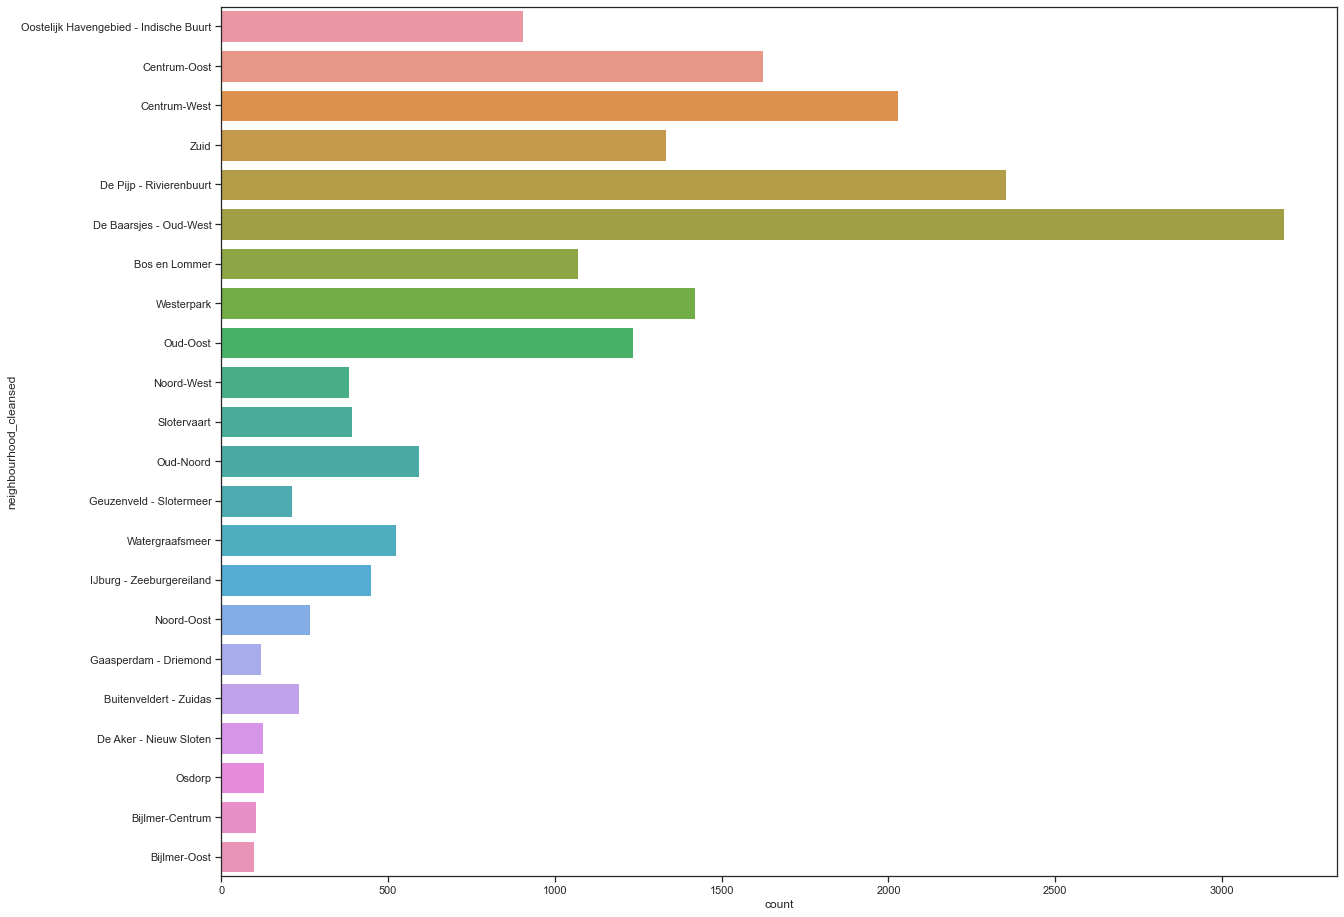

In [256]:
plt.figure(figsize=(20, 16))
sns.countplot(y='neighbourhood_cleansed', data=df)
# sns.barplot(x = df['price'].median(), y = df['neighbourhood_cleansed'])

In [257]:
# Смотрим процент пропущенных значений
df.isna().mean().round(4).multiply(100)

host_is_superhost               0.30
host_listings_count             0.30
host_identity_verified          0.30
neighbourhood_cleansed          0.00
property_type                   0.00
accommodates                    0.00
bedrooms                        5.26
price                           0.00
minimum_nights                  0.00
maximum_nights                  0.00
availability_90                 0.00
number_of_reviews               0.00
review_scores_rating            0.00
review_scores_accuracy         13.59
review_scores_cleanliness      13.59
review_scores_checkin          13.64
review_scores_communication    13.59
review_scores_location         13.62
review_scores_value            13.62
reviews_per_month              12.19
balcony                         0.00
bed_linen                       0.00
tv                              0.00
coffee_machine                  0.00
cooking_basics                  0.00
white_goods                     0.00
parking                         0.00
o

In [258]:
# Убираем пропущенные
no_na_df = df.dropna()
print('Percentage left: ' + str(100 * (len(no_na_df)/len(df))))
df = no_na_df

# Дропаем листинги дороже 1000 долларов за ночь - их мало
#under_1k = df.where(df['price'].le(1000))
#df=under_1k
#df.quantile(q=0.5, axis=0, numeric_only=True, interpolation='linear')

Percentage left: 81.57278245128315


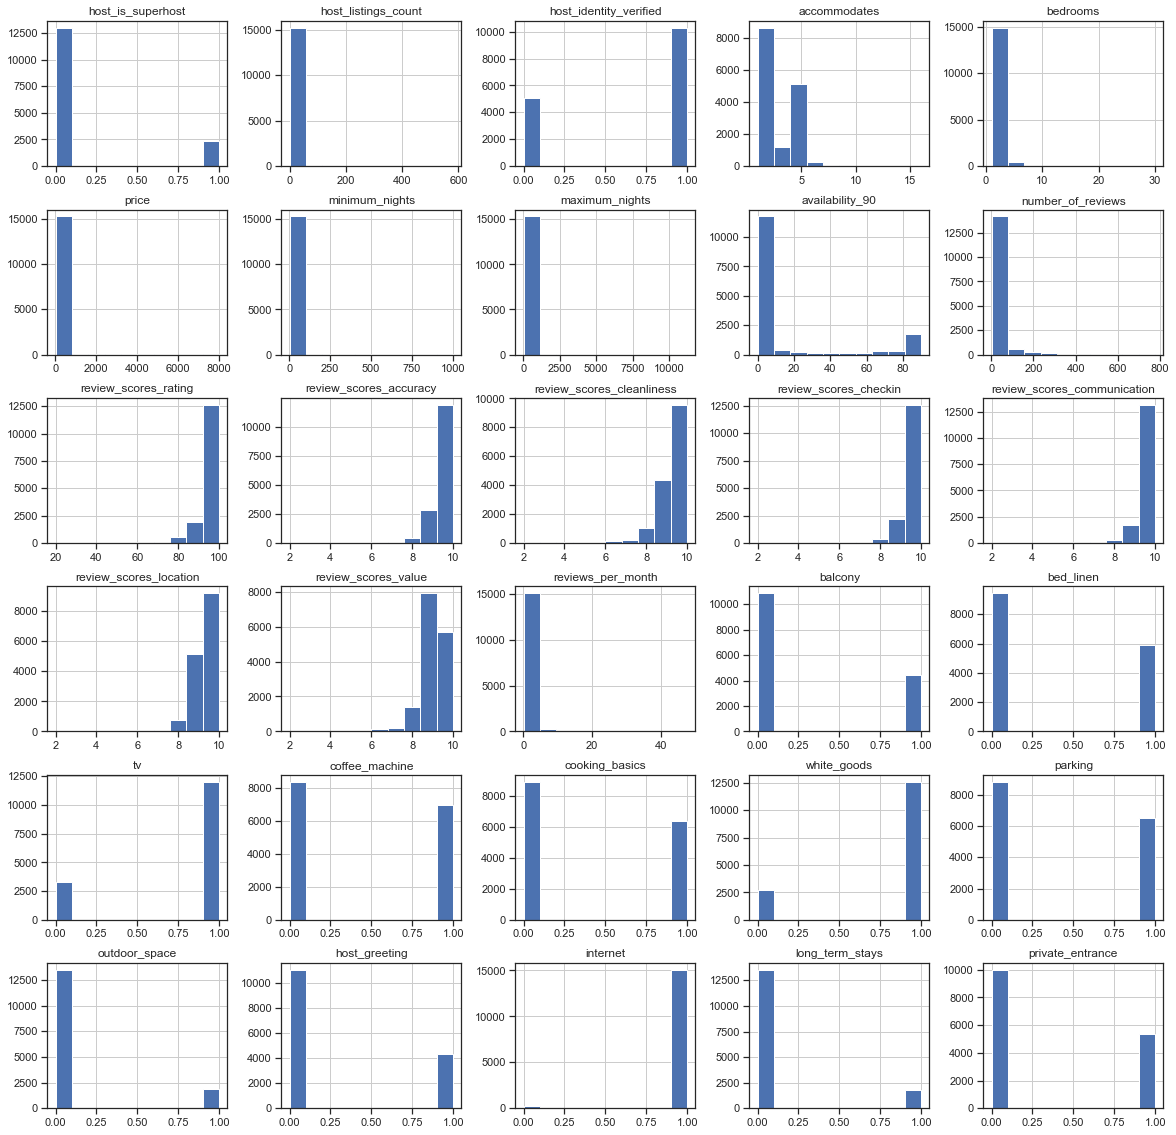

In [259]:


import matplotlib.pyplot as plt

# for column in df.columns:
#     series = df[column]
#     print(column)
#     plt.hist(series,100)
#     plt.show()

#     plt.boxplot(series)
#     plt.show()

# names = list(data.keys())
# values = list(data.values())

# fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
# axs[0].bar(df['neighbourhood_cleansed'], df['neighbourhood_cleansed'])
# axs[1].bar(df['property_type'], values)
# axs[2].bar(names, values)

# display(df[['neighbourhood_cleansed', 'price']].groupby(['neighbourhood_cleansed']).mean().plot.bar())
# display(df[['neighbourhood_cleansed', 'price']].groupby(['neighbourhood_cleansed']).mean().sort_values(by='price', ascending=False))
# display(df[['neighbourhood_cleansed', 'price']].groupby(['neighbourhood_cleansed']).count().sort_values(by='price', ascending=False))
# display(df[['property_type', 'price']].groupby(['property_type']).mean().sort_values(by='price', ascending=False))
# display(df[['property_type', 'price']].groupby(['property_type']).count().sort_values(by='price', ascending=False))
# display(df[['room_type', 'price']].groupby(['room_type']).mean().sort_values(by='price', ascending=False))
# display(df[['room_type', 'price']].groupby(['room_type']).count().sort_values(by='price', ascending=False))

df.hist(figsize=(20,20), bins=10);

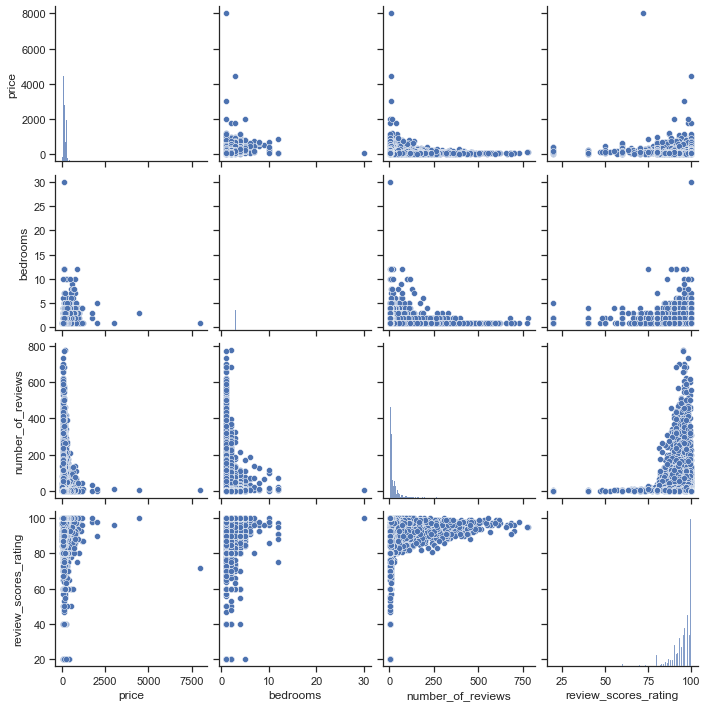

In [260]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df[['price',
                 'bedrooms',
                 'number_of_reviews',
                 'review_scores_rating',
#                  'review_scores_accuracy',
#                  'review_scores_cleanliness',
#                  'review_scores_checkin',
#                  'review_scores_communication',
#                  'review_scores_location',
#                  'review_scores_value',
                ]])

Price: 


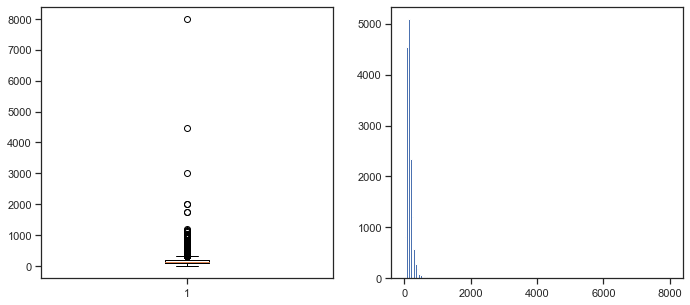

In [261]:
# Посмотрим на распределение цен на апартаменты:
series = df['price']
print('Price: ')

plt.figure(figsize=(11.5, 5))

# sp1
plt.subplot(121)
plt.boxplot(series)

# sp2
plt.subplot(122)
plt.hist(series, bins= int(len(df['price'])/100))

plt.show()




<AxesSubplot:xlabel='property_type', ylabel='price'>

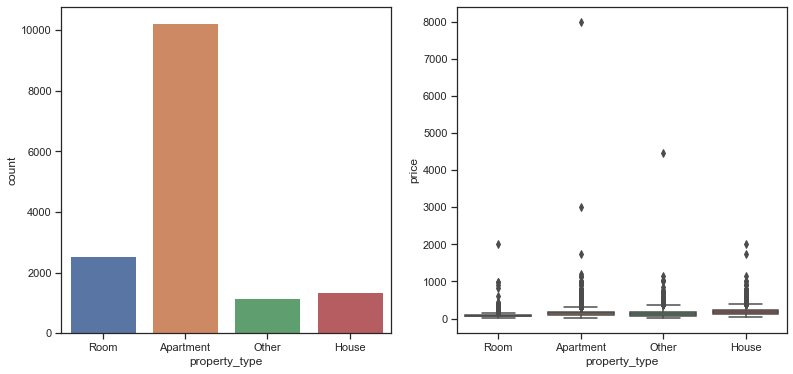

In [262]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
sns.countplot(x='property_type', data=df)
plt.subplot(122)
sns.boxplot(x="property_type", y="price",data=df)

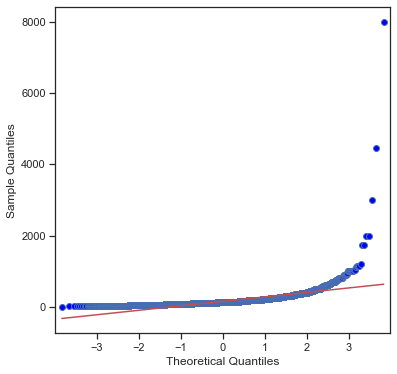

In [263]:
import statsmodels

fig, ax = plt.subplots(figsize=(6, 6))
statsmodels.graphics.gofplots.qqplot(df['price'], ax=ax, line='s')
plt.show()

In [264]:
triple_std_dev = df['price'].std(axis=0) * 3
print(triple_std_dev)
less_than_upper_bound = df.loc[(df['price'] < triple_std_dev)]
print('Percentage left: ' + str(100 * (len(less_than_upper_bound)/len(df))))
df = less_than_upper_bound

377.2833996760696
Percentage left: 96.93231512303375


<AxesSubplot:xlabel='property_type', ylabel='price'>

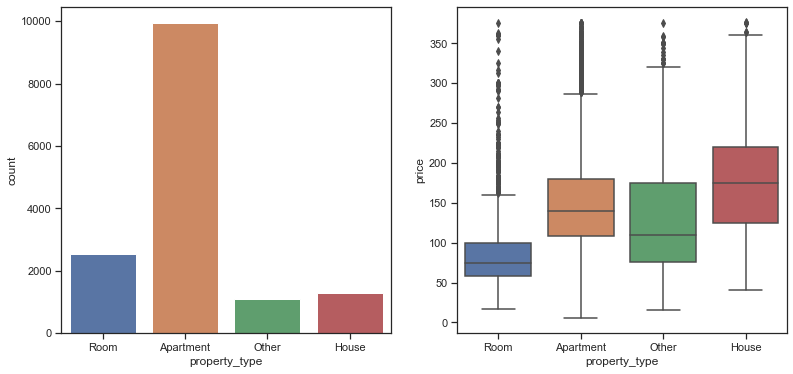

In [265]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
sns.countplot(x='property_type', data=df)
plt.subplot(122)
sns.boxplot(x="property_type", y="price",data=df)

In [266]:
from scipy.stats import normaltest

# normality test
stat, p = normaltest(df['price'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')
    
# normality test for log
stat, p = normaltest(np.log(df['price']))
print('Log statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Log sample looks Gaussian (fail to reject H0)')
else:
	print('Log sample does not look Gaussian (reject H0)')

Statistics=1848.735, p=0.000
Sample does not look Gaussian (reject H0)
Log statistics=398.440, p=0.000
Log sample does not look Gaussian (reject H0)


Price: 


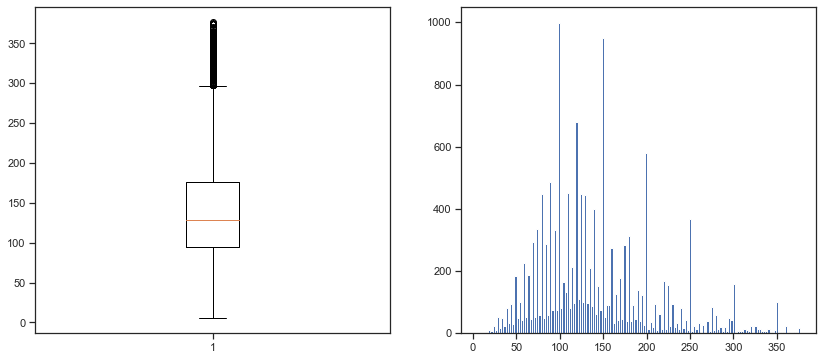

In [267]:
series = df['price']
print('Price: ')

plt.figure(figsize=(14, 6))

# sp1
plt.subplot(121)
plt.boxplot(series)

# sp2
plt.subplot(122)
plt.hist(series, bins= int(len(df['price'])/100))

plt.show()

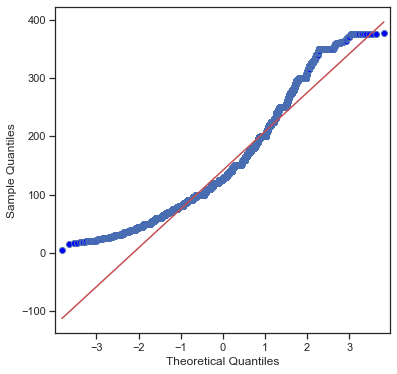

In [268]:
import statsmodels

fig, ax = plt.subplots(figsize=(6, 6))
statsmodels.graphics.gofplots.qqplot(df['price'], ax=ax, line='s')
plt.show()

In [269]:
# df['price'] = np.log(df['price']) #logarithm improves prediction by around 0.05 - 0.1
TARGET_COLUMN = 'price'
ALL_BUT_TARGET_COLUMN = df.columns[df.columns != TARGET_COLUMN]


In [270]:
# import matplotlib.pyplot as plt
# from sklearn import linear_model
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.model_selection import train_test_split

# TARGET_COLUMN = 'price'

# ALL_BUT_TARGET_COLUMN = df.columns[df.columns != TARGET_COLUMN]

# train, test = train_test_split(df, test_size=0.2)

# # Тренировочная выборка
# predictors = train[ALL_BUT_TARGET_COLUMN]
# target = train[[TARGET_COLUMN]]

# # Контрольная выборка
# test_predictors = test[ALL_BUT_TARGET_COLUMN]
# test_target = test[[TARGET_COLUMN]]

# regr = linear_model.LinearRegression()
# est = regr.fit(predictors, target)

# # Предсказываем на контрольной выборке
# prediction = regr.predict(test_predictors)


# mse = mean_squared_error(test_target, prediction)
# mse_root = math.sqrt(mean_squared_error(test_target, prediction))
# r2 = r2_score(test_target, prediction)

# print('MSE: %.2f' % mse)
# print('Mean Error: %.2f' % mse_root)
# print('R^2: %.2f' % r2)

# print('Коэфициенты: \n', pd.DataFrame(regr.coef_[0].round(3), index=ALL_BUT_TARGET_COLUMN))
# print(len(regr.coef_[0]))
# print(len(ALL_BUT_TARGET_COLUMN))

# Пробуем кросс-валидацию???

<AxesSubplot:>

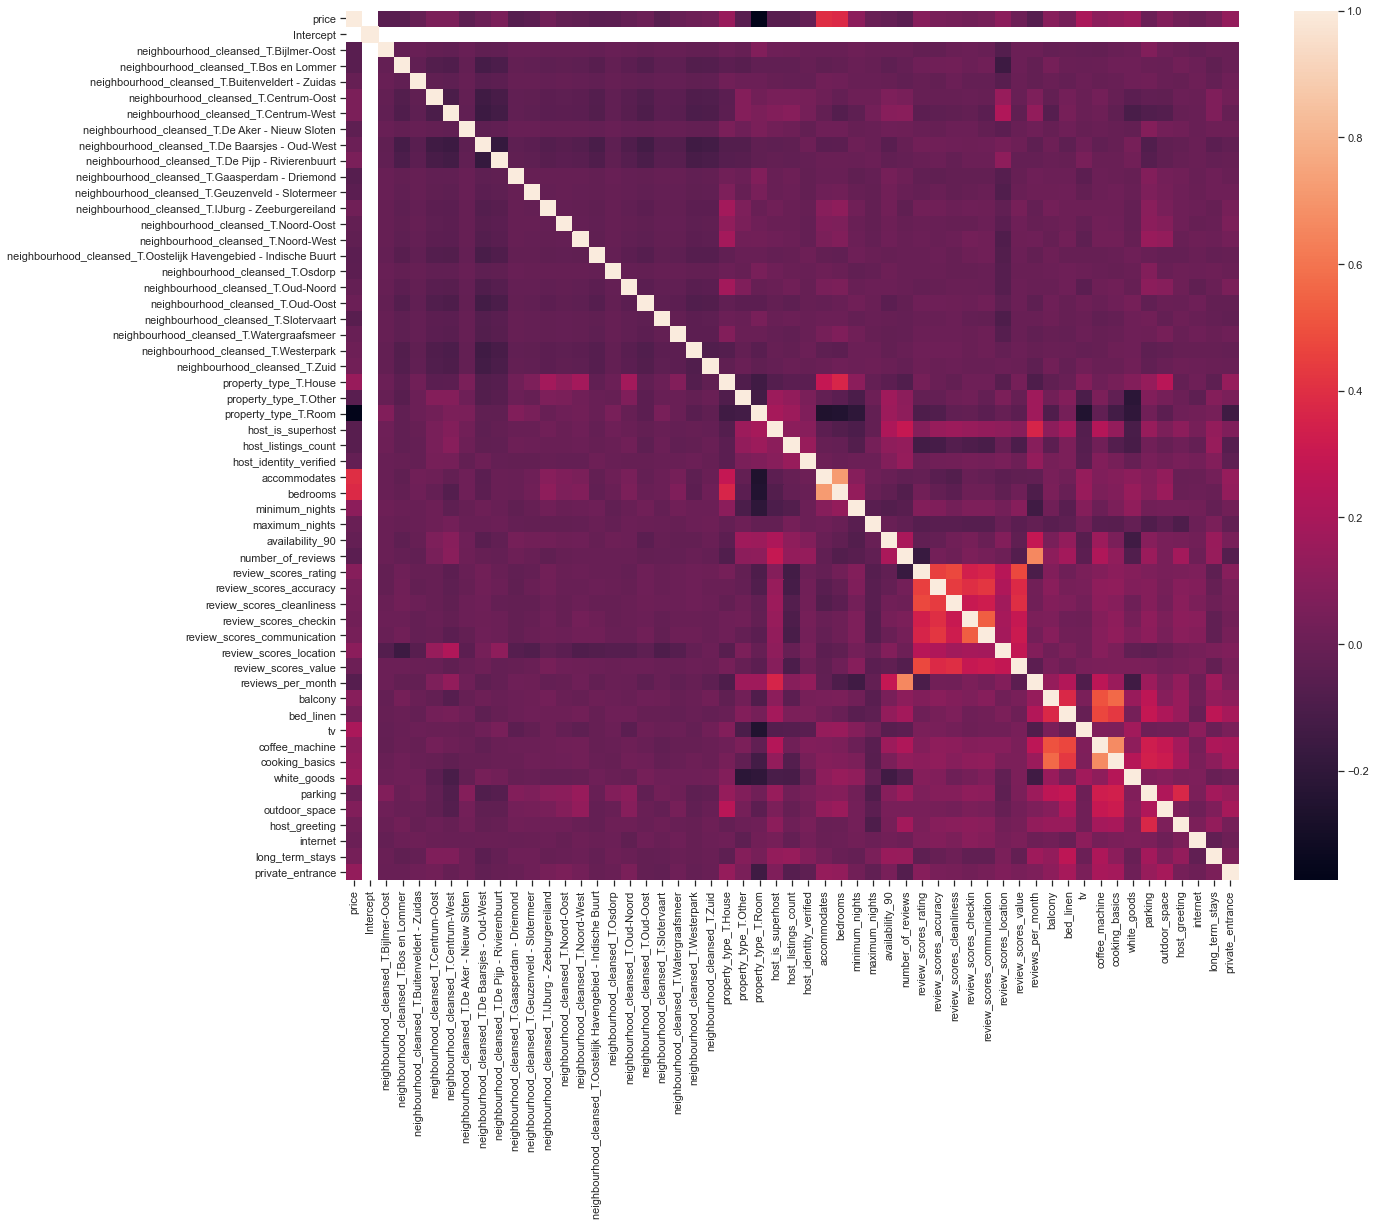

In [288]:
# Готовим датасет для моделей
from patsy import dmatrices
import seaborn as sns

# Уравнение регрессии
equation = TARGET_COLUMN + ' ~ ' + (' + '.join(ALL_BUT_TARGET_COLUMN))

y, X = dmatrices(equation, data=df, return_type='dataframe')

renamer = lambda x: x.replace('[', '_').replace(']', '')

y = y.rename(columns = renamer)
X = X.rename(columns = renamer)

plt.figure(figsize=(20, 16))
sns.heatmap(y.join(X).corr(method='kendall'))
# sns.heatmap(y.join(X[['accommodates', 'bedrooms', ]]))

In [272]:
# Разбиваем выборку
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [289]:
# Градиентиный бустинг c деревьями
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import xgboost as xgb
import numpy as np

data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)

In [274]:
from sklearn.model_selection import GridSearchCV

### Лучшие параметры:
#  {'colsample_bytree': 0.7999999999999999,
#   'gamma': 0,
#   'max_depth': 5,
#   'min_child_weight': 3},
#  0.4863149499475833)

# Выполняется долго, можно сходить попить чайку
# Пробуем перебрать разные модели:
# param_test1 = {
#     'colsample_bytree': np.arange(0.7, 0.9, 0.1),
#     'gamma': [0, 1],
# #     'learning_rate': range(0, 1, 0.1),
#     'max_depth': range(3,7,2),
#     'min_child_weight': range(1,6,2)
# }
# gsearch1 = GridSearchCV(estimator = xgb.XGBRegressor(learning_rate =0.1, n_estimators=100,
# objective= 'reg:squarederror', nthread=4, scale_pos_weight=1, seed=123), 
# param_grid = param_test1, scoring='r2',n_jobs=8, cv=5)
# gsearch1.fit(X_train,y_train) 
# gsearch1.cv_results_ , gsearch1.best_params_, gsearch1.best_score_

In [275]:
from sklearn.model_selection import GridSearchCV

### Лучшие параметры:
#  {'colsample_bytree': 0.7999999999999999,
#   'gamma': 0,
#   'max_depth': 5,
#   'min_child_weight': 3},
#  0.4863149499475833)

# Выполняется долго, можно сходить попить чайку
# Пробуем перебрать разные модели:
# param_test1 = {
#     'colsample_bytree': np.arange(0.1, 1, 0.1),
# #     'gamma': [0, 1],
# #     'learning_rate': range(0, 1, 0.1),
#     'max_depth': range(1,7,1),
# #     'min_child_weight': range(1,6,2)
# }
# gsearch1 = GridSearchCV(estimator = xgb.XGBRegressor(learning_rate =0.1, n_estimators=100,
# objective= 'reg:squarederror', nthread=4, scale_pos_weight=1, min_child_weight= 1, gamma= 0,colsample_bytree= 0.8, seed=123),
#                         param_grid = param_test1, scoring='r2',n_jobs=8, cv=5)
# gsearch1.fit(X_train,y_train) 
# gsearch1.cv_results_ , gsearch1.best_params_, gsearch1.best_score_

In [276]:
from sklearn.model_selection import GridSearchCV


# Выполняется долго, можно сходить попить чайку
# Пробуем перебрать разные модели:
# param_test1 = {
#     'colsample_bytree': np.arange(0.1, 1, 0.1),
#     'alpha': range(0,10,1),
# #     'gamma': [0, 1],
# #     'learning_rate': range(0, 1, 0.1),
# #     'max_depth': range(1,7,1),
# #     'min_child_weight': range(1,6,2)
# }
# gsearch1 = GridSearchCV(estimator = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1,
#                 max_depth = 6, min_child_weight = 3, gamma = 0, n_estimators = 100, seed=123),
#                         param_grid = param_test1, scoring='r2',n_jobs=8, cv=5)
# gsearch1.fit(X_train,y_train) 
# gsearch1.cv_results_ , gsearch1.best_params_, gsearch1.best_score_

In [277]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.01,
                max_depth = 6, min_child_weight = 3, alpha = 6, gamma = 0, n_estimators = 1000, seed=123)

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [278]:
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)
adjusted_r_2 = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)

print('MSE: %.2f' % mse)
print('Mean Error: %.2f$' % rmse)
print('R^2: %.2f' % r2)
print('Adjusted R^2: %.2f' % adjusted_r_2)
print(xg_reg)

MSE: 2301.51
Mean Error: 47.97$
R^2: 0.50
Adjusted R^2: 0.50
XGBRegressor(alpha=6, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=6,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=123,
             reg_alpha=6, reg_lambda=1, scale_pos_weight=1, seed=123,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)


Text(0.5, 1.0, 'Prediction quality')

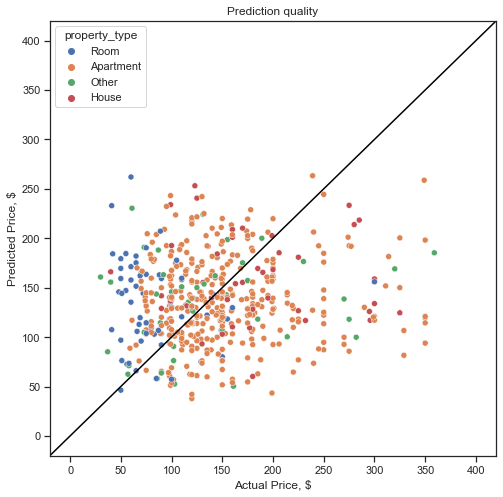

In [290]:
# y_test['price']

pred_scatter_index = range(0, len(y_test))

vec_test = pd.Series(y_test['price'], index = pred_scatter_index, dtype='float')
vec_pred = pd.Series(preds, index = pred_scatter_index, dtype='float')
        
frame = { 'Actual Price, $': vec_test, 'Predicted Price, $': vec_pred,} 
  
comp_df = pd.DataFrame(frame, index=pred_scatter_index).join(df['property_type'].reindex(pred_scatter_index))

plt.figure(figsize=(8, 8))
plt.axline((0, 0), (400, 400), color='black')
sns.scatterplot(x='Actual Price, $',
                y='Predicted Price, $',
                hue='property_type',
                data=comp_df).set_title('Prediction quality')

Text(0.5, 1.0, 'Prediction quality: Other')

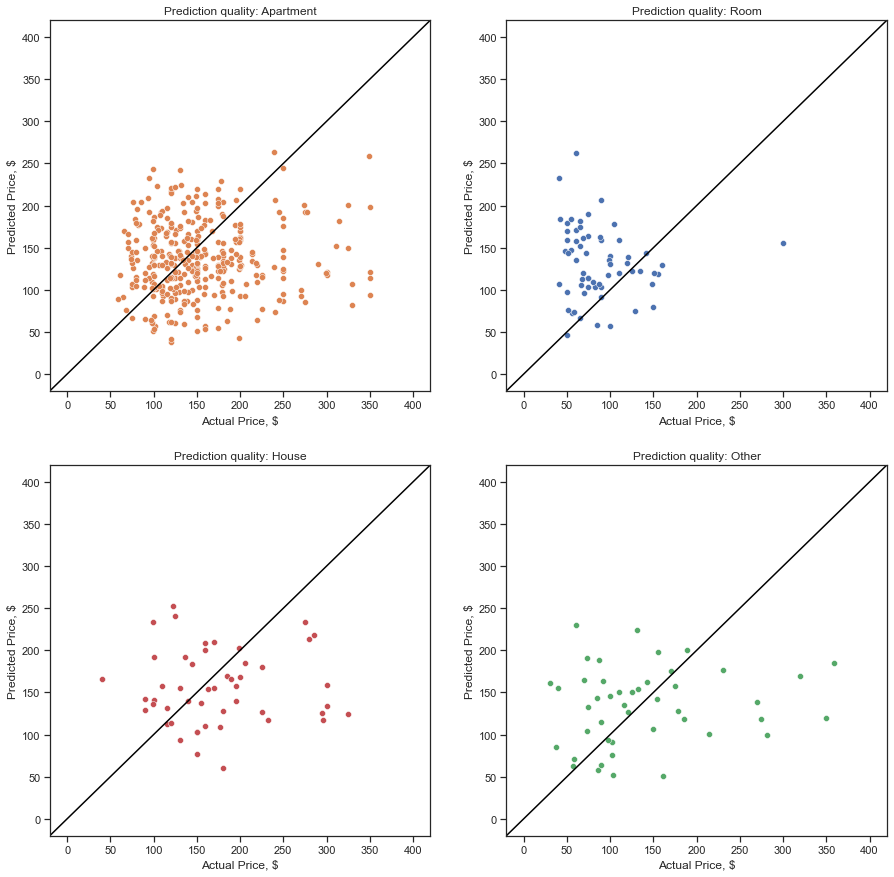

In [280]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(15, 15))

ax1.axline((0, 0), (400, 400), color='black')
sns.scatterplot(x='Actual Price, $',
                y='Predicted Price, $',
                ax=ax1,
                color='#DD8452',
                data=comp_df.where(df['property_type']=='Apartment')).set_title('Prediction quality: Apartment')

ax2.axline((0, 0), (400, 400), color='black')
sns.scatterplot(x='Actual Price, $',
                y='Predicted Price, $',
                ax=ax2,
                color='#4C72B0',
                data=comp_df.where(df['property_type']=='Room')).set_title('Prediction quality: Room')


ax3.axline((0, 0), (400, 400), color='black')
sns.scatterplot(x='Actual Price, $',
                y='Predicted Price, $',
                ax=ax3,
                color='#C44E52',
                data=comp_df.where(df['property_type']=='House')).set_title('Prediction quality: House')

ax4.axline((0, 0), (400, 400), color='black')
sns.scatterplot(x='Actual Price, $',
                y='Predicted Price, $',
                ax=ax4,
                color='#55A868',
                data=comp_df.where(df['property_type']=='Other')).set_title('Prediction quality: Other')

In [281]:
ft_weights_xgb_reg = pd.DataFrame(xg_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', ascending=False, inplace=True)
ft_weights_xgb_reg

,weight
property_type_T.Room,0.190338
accommodates,0.133540
bedrooms,0.129517
neighbourhood_cleansed_T.Centrum-West,0.039934
tv,0.038118
review_scores_location,0.024056
neighbourhood_cleansed_T.Centrum-Oost,0.022740
property_type_T.House,0.021673
coffee_machine,0.019559
neighbourhood_cleansed_T.Noord-West,0.016546


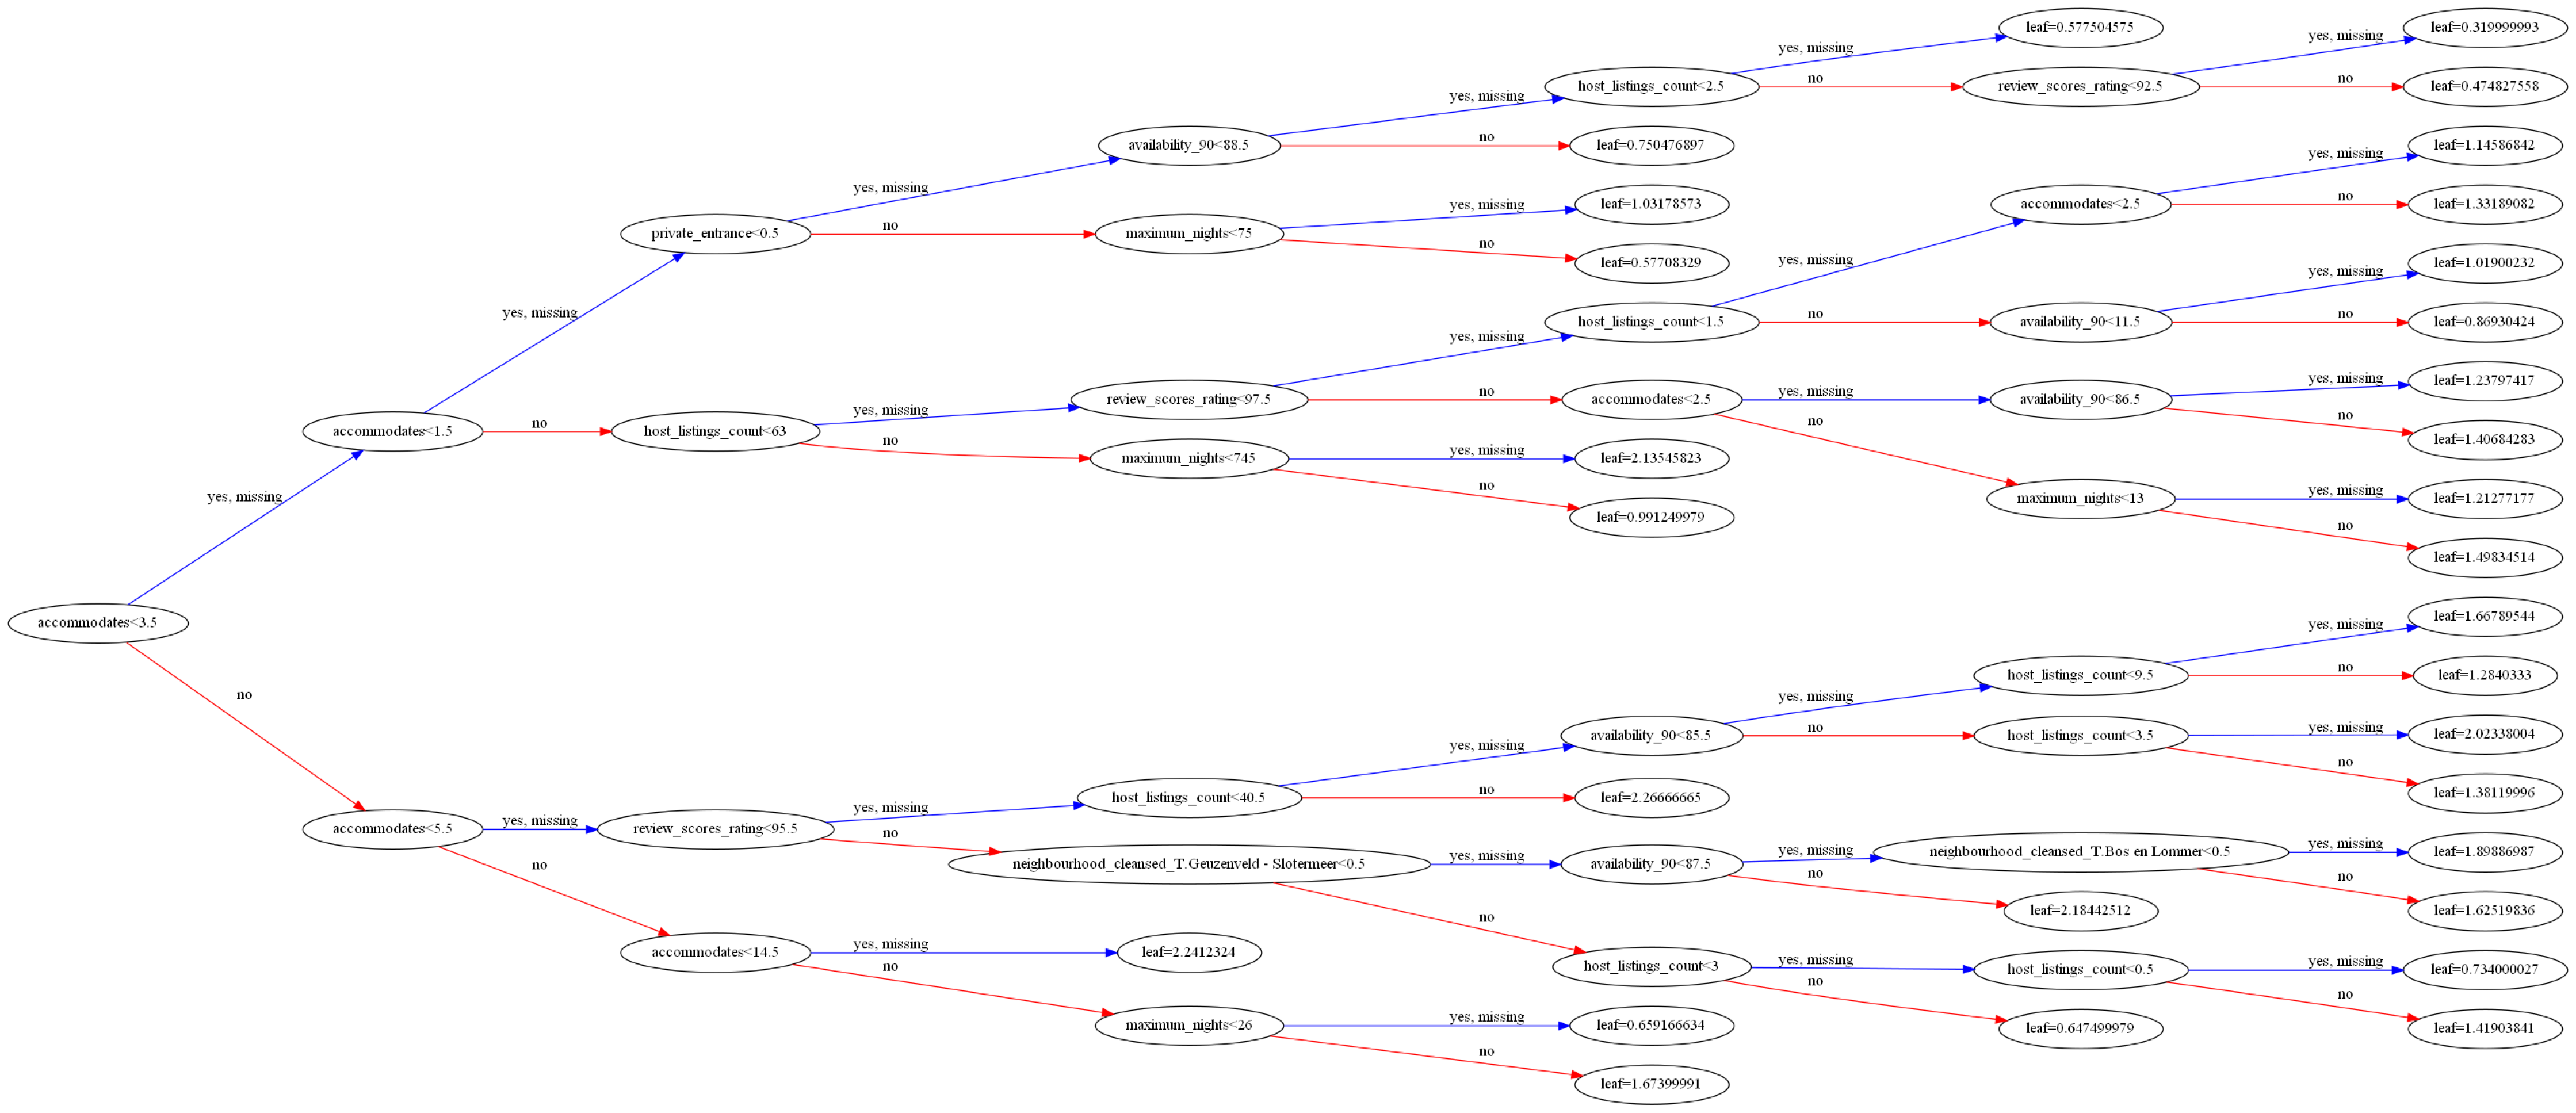

In [282]:
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files/Graphviz/bin/' # Можно добавить graphviz руками
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 80,120

# xgb.plot_tree(xg_reg, rankdir='LR'); plt.show()
xgb.plot_tree(xg_reg, num_trees=0, rankdir='LR'); plt.show()
# xgb.plot_tree(xg_reg, num_trees=0, rankdir='LR'); plt.show()

In [283]:
# Попробуем регрессионный бустинг
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import xgboost as xgb
import numpy as np

xg_reg_linear = xgb.XGBRegressor(objective ='reg:squarederror',
                          booster='gblinear',
                          learning_rate = 0.01,
                          alpha = 10,
                          n_estimators = 1000)

xg_reg_linear.fit(X_train,y_train)

preds_lin = xg_reg_linear.predict(X_test)

In [284]:
mse = mean_squared_error(y_test, preds_lin)
rmse = np.sqrt(mean_squared_error(y_test, preds_lin))
r2 = r2_score(y_test, preds_lin)
adjusted_r_2 = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)

print('MSE: %.2f' % mse)
print('Mean Error: %.2f$' % rmse)
print('R^2: %.2f' % r2)
print('Adjusted R^2: %.2f' % adjusted_r_2)
print(xg_reg_linear)

MSE: 3465.01
Mean Error: 58.86$
R^2: 0.25
Adjusted R^2: 0.25
XGBRegressor(alpha=10, base_score=0.5, booster='gblinear',
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, gamma=None, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.01, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=8, num_parallel_tree=None,
             random_state=0, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
             subsample=None, tree_method=None, validate_parameters=1,
             verbosity=None)


In [285]:
# ft_weights_xgb_reg = pd.DataFrame(xg_reg_linear.feature_importances_, columns=['weight'], index=X_train.columns)
# ft_weights_xgb_reg.sort_values('weight', ascending=False, inplace=True)
# ft_weights_xgb_reg

# Вывод: деревья лучше, но не понятно, как они работают

In [286]:
# Пробуем использовать либу для обычной регрессии
import numpy as np
import statsmodels.api as sm
from patsy import dmatrices

model = sm.OLS(y, X)
results = model.fit()
display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     204.1
Date:                Sun, 20 Dec 2020   Prob (F-statistic):               0.00
Time:                        21:24:50   Log-Likelihood:                -79352.
No. Observations:               14851   AIC:                         1.588e+05
Df Residuals:                   14797   BIC:                         1.592e+05
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
Intercept                                                         -23.9428     10.781     -2.221      0.026     -45.074      -2.811
neighbourhood_cleansed_T.Bijlmer-Oost                               3.9089      8.179      0.478      0.633     -12.123      19.941
neighbourhood_cleansed_T.Bos en Lommer                             12.8441      6.211      2.068      0.039       0.669      25.019
neighbourhood_cleansed_T.Buitenveldert - Zuidas                    13.1495      7.084      1.856      0.063      -0.736      27.035
neighbourhood_cleansed_T.Centrum-Oost                              46.1758      6.163      7.492      0.000      34.095      58.257
neighbourhood_cleansed_T.Centrum-West                              50.3655      6.145      8.197      0.000      38.321      62.410
neighbourhood_cleansed_T.De Aker - Nieuw Sloten                    -0.0098      7.986     -0.001      0.999     -15.664      15.644
neighbourhood_cleansed_T.De Baarsjes - Oud-West                    29.1560      6.064      4.808      0.000      17.270      41.042
neighbourhood_cleansed_T.De Pijp - Rivierenbuurt                   35.4716      6.109      5.807      0.000      23.498      47.445
neighbourhood_cleansed_T.Gaasperdam - Driemond                     -5.0496      7.741     -0.652      0.514     -20.223      10.124
neighbourhood_cleansed_T.Geuzenveld - Slotermeer                   -0.6686      7.168     -0.093      0.926     -14.719      13.382
neighbourhood_cleansed_T.IJburg - Zeeburgereiland                  15.1858      6.599      2.301      0.021       2.251      28.120
neighbourhood_cleansed_T.Noord-Oost                                -0.5583      6.896     -0.081      0.935     -14.075      12.958
neighbourhood_cleansed_T.Noord-West                                -1.9775      6.657     -0.297      0.766     -15.027      11.072
neighbourhood_cleansed_T.Oostelijk Havengebied - Indische Buurt    14.9524      6.255      2.391      0.017       2.693      27.212
neighbourhood_cleansed_T.Osdorp                                     1.5354      7.817      0.196      0.844     -13.787      16.858
neighbourhood_cleansed_T.Oud-Noord                                  9.6710      6.429      1.504      0.133      -2.930      22.272
neighbourhood_cleansed_T.Oud-Oost                                  24.1209      6.186      3.899      0.000      11.995      36.247
neighbourhood_cleansed_T.Slotervaart                                6.0446      6.604      0.915      0.360      -6.901      18.990
neighbourhood_cleansed_T.Watergraafsmeer                           15.1791      6.558      2.315      0.021       2.325      28.034
neighbourhood_cleansed_T.Westerpark            